#### 原始+对偶

In [1]:
import numpy as np  #传入的数据要求列是变量，行是观测，假设n个观测，p个变量
class PerceptionMethod(object):  # 定义 感知机学习 类
    def __init__(self, X, Y, eta):  # 类中参数是 X,Y（X,Y)均为numpy数组,eta,eta是学习率
        if X.shape[0] != Y.shape[0]:  # 要求X,Y中的行数一样，(n相同)
            raise ValueError('Error,X and Y must be same when axis=0 ')
        else:  # 在类中储存参数
            self.X = X
            self.Y = Y
            self.eta = eta

    def ini_Per(self):  # 感知机的原始形式
        weight = np.zeros(self.X.shape[1])  # 初始化weight,b（weight是p维的向量）
        b = 0
        number = 0  # 记录训练次数
        mistake = True  # mistake是变量用来说明分类是否有错误
        while mistake is True:  # 当有错时
            mistake = False  # 开始下一轮纠错前需要将mistake变为true，一来判断这一轮是否有错误
            for index in range(self.X.shape[0]):  # index取值0~n-1(一共n个观测)
                if self.Y[index] * (weight @ self.X[index] + b) <= 0:  # 错误判断条件,@表示内积，*表示对应元素相乘
                    weight += self.eta * self.Y[index] * self.X[index]  # 进行更新weight，b
                    b += self.eta * self.Y[index]
                    number += 1
                    print(weight, b)
                    mistake = True  # 此轮检查出错误，表明mistake为true，进行下列一轮
                    break  # 找出第一个错误后调出循环
                #假如说有(12345)其中2，4是误分类点，那么计算顺序是12/1234/12345就是说每更新一次，下一次都是从头开始。
        return weight, b  # 返回值
        
    #对偶形式
    def dual_Per(self):
        Gram = np.dot(self.X, self.X.T) #计算Gram矩阵
        alpha = np.zeros(self.X.shape[0]) #初始化a向量，学习率为1时，a_i代表X_i的更新次数
        b = 0
        mistake = True
        while mistake is True:
            mistake = False
            for index in range(self.X.shape[0]):
                if self.Y[index] * (alpha * self.Y @ Gram[index] + b) <= 0: #y_i*(求和a_j*x_j*y_j+b)
                #@表示对应元素相乘再相加（a,b中有一个是一维数组），*表示对应元素相乘，计算顺序从左往右
                    alpha[index] += self.eta
                    b += self.eta * self.Y[index]
                    print(alpha, b)
                    mistake = True
                    break
        weight = self.Y * alpha @ self.X #w是p维向量，@是矩阵乘法，
        #(我也不清楚np里面的矩阵行向量与列向量的区别，反正乘再加就是@或者np.dot,只乘不加就是*)
        return weight, b

##### 例子

In [2]:
x = np.array([[3,3],[4,3],[1,1]])
y = np.array([1,1,-1])
pre = PerceptionMethod(x,y,1)
print(pre.ini_Per())

[3. 3.] 1
[2. 2.] 0
[1. 1.] -1
[0. 0.] -2
[3. 3.] -1
[2. 2.] -2
[1. 1.] -3
(array([1., 1.]), -3)


In [3]:
x = np.array([[3,3],[4,3],[1,1]])
y = np.array([1,1,-1])
pre = PerceptionMethod(x,y,1)
print(pre.dual_Per())

[1. 0. 0.] 1
[1. 0. 1.] 0
[1. 0. 2.] -1
[1. 0. 3.] -2
[2. 0. 3.] -1
[2. 0. 4.] -2
[2. 0. 5.] -3
(array([1., 1.]), -3)


#### 实战鸢尾花数据集
##### 用两个特征分离两种鸢尾花

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./data/iris.csv',index_col=0)
df.columns = ['sepalLength','sepalWidth','petalLength','pentalWidth','species']
df['label']=pd.factorize(df['species'])[0]
df

,sepalLength,sepalWidth,petalLength,pentalWidth,species,label
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica,2
147,6.3,2.5,5.0,1.9,virginica,2
148,6.5,3.0,5.2,2.0,virginica,2
149,6.2,3.4,5.4,2.3,virginica,2


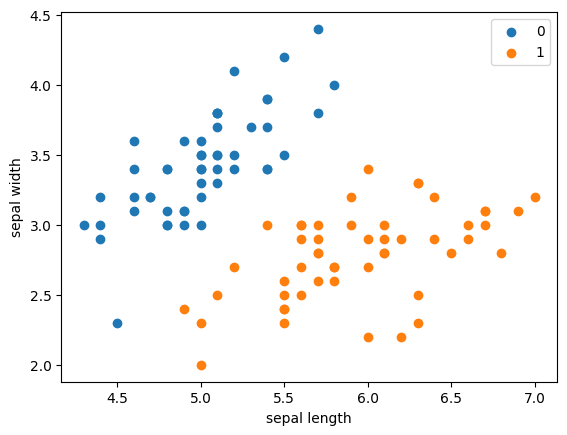

In [20]:
plt.scatter(df[:50]['sepalLength'].values, df[:50]['sepalWidth'].values, label='0')
plt.scatter(df[50:101]['sepalLength'].values, df[50:101]['sepalWidth'].values, label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [32]:
data = np.array(df.iloc[:100,[0,1,-1]])
x,y = data[:,:-1],data[:,-1]
y = np.array([1 if i==1 else -1 for i in y])
x,y

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6],
        [5.4, 3.9],
        [4.6, 3.4],
        [5. , 3.4],
        [4.4, 2.9],
        [4.9, 3.1],
        [5.4, 3.7],
        [4.8, 3.4],
        [4.8, 3. ],
        [4.3, 3. ],
        [5.8, 4. ],
        [5.7, 4.4],
        [5.4, 3.9],
        [5.1, 3.5],
        [5.7, 3.8],
        [5.1, 3.8],
        [5.4, 3.4],
        [5.1, 3.7],
        [4.6, 3.6],
        [5.1, 3.3],
        [4.8, 3.4],
        [5. , 3. ],
        [5. , 3.4],
        [5.2, 3.5],
        [5.2, 3.4],
        [4.7, 3.2],
        [4.8, 3.1],
        [5.4, 3.4],
        [5.2, 4.1],
        [5.5, 4.2],
        [4.9, 3.1],
        [5. , 3.2],
        [5.5, 3.5],
        [4.9, 3.6],
        [4.4, 3. ],
        [5.1, 3.4],
        [5. , 3.5],
        [4.5, 2.3],
        [4.4, 3.2],
        [5. , 3.5],
        [5.1, 3.8],
        [4.8, 3. ],
        [5.1, 3.8],
        [4.6, 3.2],
        [5.3, 3.7],
        [5. , 3.3],


In [33]:
iris2 = PerceptionMethod(x,y,0.5)
iris2.dual_Per()

[0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ] -0.5
[0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ] 0.0
[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

(array([ 39.1, -50.2]), -60.5)

In [35]:
weight,b = iris2.ini_Per()

[-2.55 -1.75] -0.5
[ 0.95 -0.15] 0.0
[-1.6 -1.9] -0.5
[ 1.9 -0.3] 0.0
[-0.65 -2.05] -0.5
[ 2.85 -0.45] 0.0
[ 0.3 -2.2] -0.5
[ 3.8 -0.6] 0.0
[ 1.25 -2.35] -0.5
[ 4.45 -0.75] 0.0
[ 1.9 -2.5] -0.5
[-0.65 -4.25] -1.0
[ 2.85 -2.65] -0.5
[ 0.3 -4.4] -1.0
[ 3.8 -2.8] -0.5
[ 1.25 -4.55] -1.0
[ 4.75 -2.95] -0.5
[ 2.2 -4.7] -1.0
[ 5.7 -3.1] -0.5
[ 3.15 -4.85] -1.0
[ 0.65 -6.35] -1.5
[ 4.15 -4.75] -1.0
[ 1.6 -6.5] -1.5
[ 5.1 -4.9] -1.0
[ 2.55 -6.65] -1.5
[ 6.05 -5.05] -1.0
[ 3.5 -6.8] -1.5
[ 6.7 -5.2] -1.0
[ 4.15 -6.95] -1.5
[ 1.9 -8.1] -2.0
[ 5.4 -6.5] -1.5
[ 2.85 -8.25] -2.0
[ 6.35 -6.65] -1.5
[ 3.8 -8.4] -2.0
[ 7.3 -6.8] -1.5
[ 4.75 -8.55] -2.0
[ 7.9 -6.9] -1.5
[ 5.35 -8.65] -2.0
[ 3.1 -9.8] -2.5
[ 6.6 -8.2] -2.0
[ 4.05 -9.95] -2.5
[ 7.55 -8.35] -2.0
[  5.  -10.1] -2.5
[ 8.2 -8.5] -2.0
[  5.65 -10.25] -2.5
[ 8.8 -8.6] -2.0
[  6.25 -10.35] -2.5
[  4.  -11.5] -3.0
[ 7.5 -9.9] -2.5
[  4.95 -11.65] -3.0
[  8.45 -10.05] -2.5
[  5.9 -11.8] -3.0
[  9.1 -10.2] -2.5
[  6.55 -11.95] -3.0
[  9.7 -10.3] -

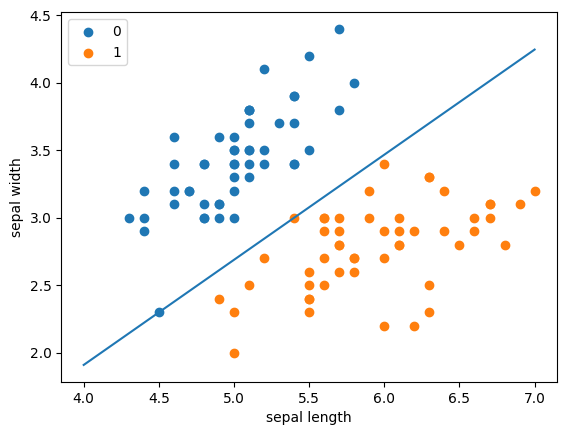

In [39]:
plt.scatter(df[:50]['sepalLength'].values, df[:50]['sepalWidth'].values, label='0')
plt.scatter(df[50:101]['sepalLength'].values, df[50:101]['sepalWidth'].values, label='1')
x_ = np.linspace(4,7,20)
y_ = -(weight[0] * x_ + b) / weight[1]
plt.plot(x_,y_)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

#### 用四个特征分离两种鸢尾花

In [29]:
data = np.array(df.iloc[:100,[0,1,2,3,-1]])
x,y = data[:,:-1],data[:,-1]
y = np.array([1 if i==1 else -1 for i in y])
x,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [30]:
iris = PerceptionMethod(x,y,0.5)
iris.dual_Per()

[0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ] -0.5
[0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ] 0.0
[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

(array([-0.65, -2.05,  2.6 ,  1.1 ]), -0.5)

In [31]:
iris.ini_Per()

[-2.55 -1.75 -0.7  -0.1 ] -0.5
[ 0.95 -0.15  1.65  0.6 ] 0.0
[-1.6  -1.9   0.95  0.5 ] -0.5
[ 1.9 -0.3  3.3  1.2] 0.0
[-0.65 -2.05  2.6   1.1 ] -0.5


(array([-0.65, -2.05,  2.6 ,  1.1 ]), -0.5)

### 调包侠版本

w = [[ 70.7 -87.9]], b = [-117.]


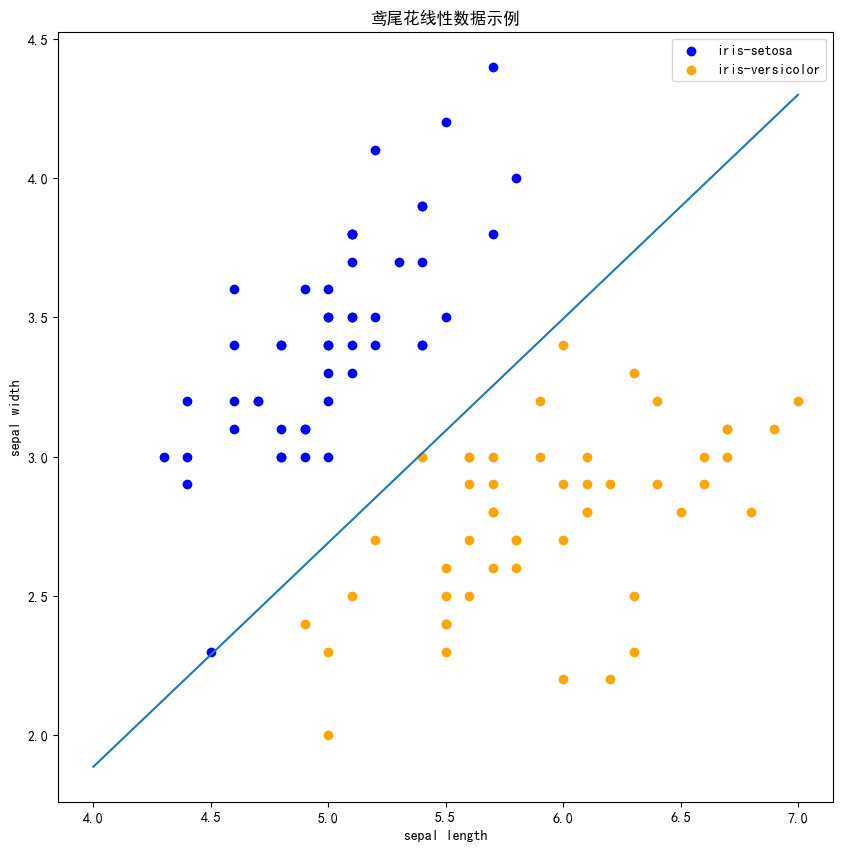

In [1]:
import sklearn
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 数据预处理
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
data = np.array(df.iloc[:100, [0, 1, -1]])
x, y = data[:, :-1], data[:, -1]
y = np.array([1 if i == 1 else -1 for i in y])

# 模型训练
clf = Perceptron(fit_intercept = True, max_iter = 1000, tol = None, shuffle = True)
clf.fit(x, y)
# 输出参数w, b
print('w = ' + str(clf.coef_) + ', b = ' + str(clf.intercept_))

# 画出图形
plt.figure(figsize = (10, 10)) #设置画布大小
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

# 画出散点图, iris-setosa:山鸢尾, iris-versicolour: 杂色鸢尾
plt.scatter(data[:50, 0], data[:50, 1], c = 'b', label = 'iris-setosa')
plt.scatter(data[50:100, 0], data[50:100, 1], c = 'orange', label = 'iris-versicolor')

# 画出感知机的线
x_ = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ + clf.intercept_) / clf.coef_[0][1]
plt.plot(x_, y_)

plt.legend() # 显示图例
plt.grid(False) # 不显示网络
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()
